## Name: Vaibhav Bichave

## Implement the Image classification CNN modelfor classifying hand-written MNISTdataset by dividing the model into following 4 stages:
    a. Loadingand preprocessingtheimagedata
    b. Definingthemodel'sarchitecture
    c. Trainingthe model
    d. Estimatingthemodel'sperformance 

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [5]:
model = Sequential([
    Conv2D(128,(3,3),activation = 'relu',input_shape=(28,28,1)),
    MaxPool2D((2,2)),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPool2D((2,2)),
    Conv2D(32,(3,3),activation = 'relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(32,activation = 'relu'),
    Dense(10,activation = 'softmax')    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)         0

In [6]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [7]:
epochs = 2
H  = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs)

Epoch 1/2
1875/1875 [==============================] - 175s 93ms/step - loss: 0.2327 - accuracy: 0.9275 - val_loss: 0.1569 - val_accuracy: 0.9529
Epoch 2/2
1875/1875 [==============================] - 211s 113ms/step - loss: 0.0831 - accuracy: 0.9744 - val_loss: 0.0786 - val_accuracy: 0.9767


In [8]:
from sklearn.metrics import classification_report
prediction = model.predict(X_test)
print(classification_report(y_test,prediction.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.99      0.98      0.98      1010
           4       0.96      0.99      0.98       982
           5       0.95      0.99      0.97       892
           6       1.00      0.94      0.97       958
           7       0.96      0.98      0.97      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



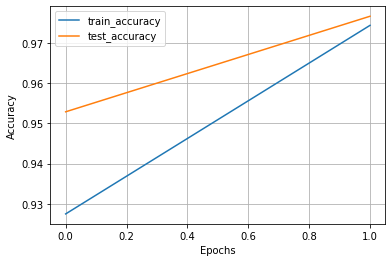

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['accuracy'],label = 'train_accuracy')
plt.plot(range(0,epochs),H.history['val_accuracy'],label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

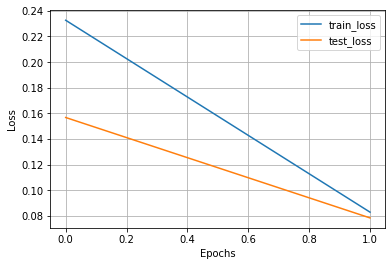

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['loss'],label = 'train_loss')
plt.plot(range(0,epochs),H.history['val_loss'],label = 'test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid();